In [ ]:
import pandas as pd

df2018 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY18') 
df2018.dropna(inplace=True)
df2019 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY19') 
df2019.dropna(inplace=True)
df2020 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY20') 
df2020.dropna(inplace=True)
df2021 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY21') 
df2021.dropna(inplace=True)

In [ ]:
len(df2018.columns),len(df2019.columns),len(df2020.columns),len(df2021.columns)

(34, 34, 34, 34)

In [ ]:
df= pd.concat([df2018,df2019,df2020,df2021])

In [ ]:
df.columns=['main_price', 'MAIN_SIRE_NAME', 'code_desc', 'CED EPD', 'BW EPD',
       'WW EPD', 'YW EPD', 'RADG EPD', 'DMI EPD', 'YH EPD', 'SC EPD',
       'Doc EPD', 'HP EPD', 'CEM EPD', 'Milk EPD', 'MW EPD', 'MH EPD', '$EN',
       'CW EPD', 'Marb EPD', 'RE EPD', 'Fat EPD', 'FOOT_ANGLE_EPD',
       'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M', '$F', '$G', '$B', '$C',
       '$AxH', '$AxJ', 'Original_Animal_Order']

In [ ]:
df_reduced = df[['main_price',  'CED EPD', 'BW EPD',
       'WW EPD', 'YW EPD', 'RADG EPD', 'DMI EPD', 'YH EPD', 'SC EPD',
       'Doc EPD', 'HP EPD', 'CEM EPD', 'Milk EPD', 'MW EPD', 'MH EPD', '$EN',
       'CW EPD', 'Marb EPD', 'RE EPD', 'Fat EPD', 'FOOT_ANGLE_EPD',
       'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M', '$F', '$G', '$B', '$C',
       '$AxH', '$AxJ']]
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 893 entries, FY18 to FY21
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   main_price         893 non-null    int64  
 1   CED EPD            893 non-null    float64
 2   BW EPD             893 non-null    float64
 3   WW EPD             893 non-null    float64
 4   YW EPD             893 non-null    float64
 5   RADG EPD           893 non-null    float64
 6   DMI EPD            893 non-null    float64
 7   YH EPD             893 non-null    float64
 8   SC EPD             893 non-null    float64
 9   Doc EPD            893 non-null    float64
 10  HP EPD             893 non-null    float64
 11  CEM EPD            893 non-null    float64
 12  Milk EPD           893 non-null    float64
 13  MW EPD             893 non-null    float64
 14  MH EPD             893 non-null    float64
 15  $EN                893 non-null    float64
 16  CW EPD             893 non-

In [ ]:
def heatMap(df):#Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(18, 18))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
    return ax

In [ ]:
# standarize
def standarize(df, symbols):
    result = df.copy()
    values={}
    for symbol in symbols:
        max_value = df[symbol].max()
        min_value = df[symbol].min()
        mean_value= df[symbol].mean()
        std_value= df[symbol].std()
        result[symbol] = (df[symbol] -mean_value) / std_value
        data={}
        data.update({'max': max_value, 'min':min_value, 'mean':mean_value, 'std':std_value})
        

        values.update({symbol:data})
    return result, values

Text(0.5, 1.0, 'Distribution of Main Price')

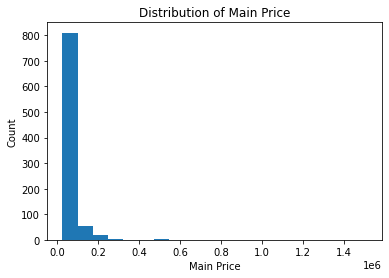

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram of main_price
plt.hist(df_reduced['main_price'], bins = 20)
plt.xlabel('Main Price')
plt.ylabel('Count')
plt.title('Distribution of Main Price')

In [ ]:
df_reduced['main_price'].min(), df_reduced['main_price'].max()

(25000, 1510000)

In [ ]:
d750=df_reduced['main_price'].quantile(q=0.750)
d500=df_reduced['main_price'].quantile(q=0.500)
d250=df_reduced['main_price'].quantile(q=0.250)
dmin=df_reduced['main_price'].min()
dmax=df_reduced['main_price'].max()
dmin, d250, d500, d750, dmax

(25000, 29000.0, 35000.0, 50000.0, 1510000)

In [ ]:
df_reduced_q1=df_reduced[(df_reduced.main_price <d250)]
df_reduced_q2=df_reduced[(df_reduced.main_price >=d250)& (df_reduced.main_price <d500)]
df_reduced_q3=df_reduced[(df_reduced.main_price >=d500)& (df_reduced.main_price <d750)]
df_reduced_q4=df_reduced[(df_reduced.main_price >=d750)]


In [ ]:
len(df_reduced_q1),len(df_reduced_q2),len(df_reduced_q3),len(df_reduced_q4)

(222, 192, 218, 261)

Text(0.5, 1.0, 'main Price q4')

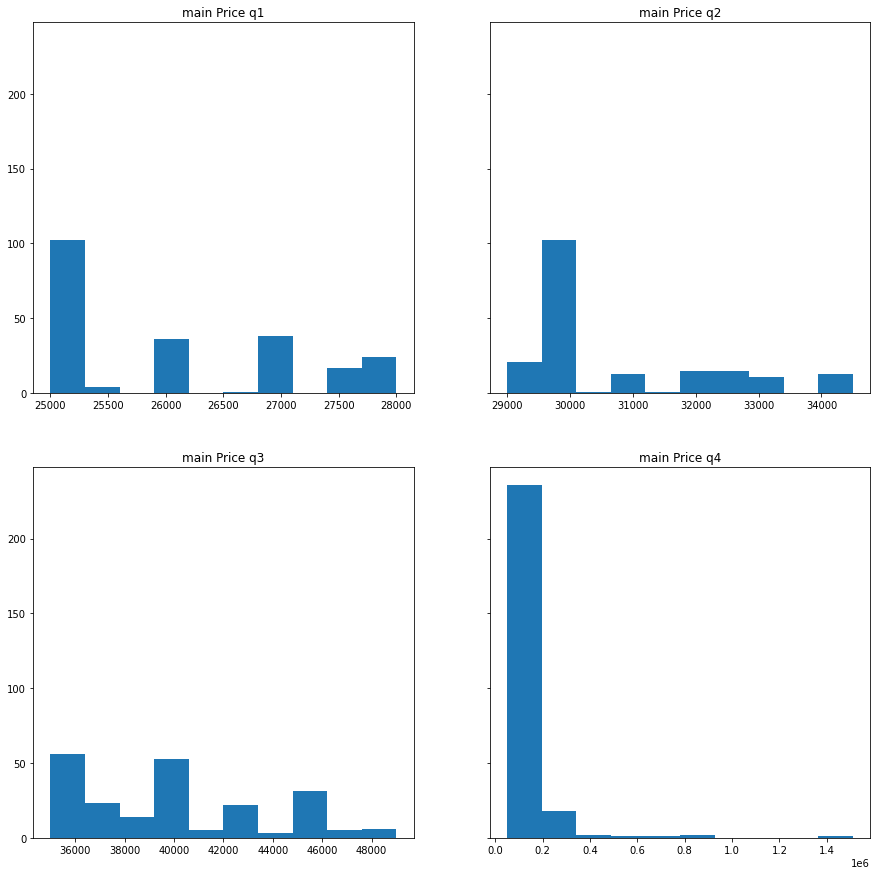

In [ ]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey=True, figsize=(15,15))
ax1.hist(df_reduced_q1['main_price'], bins = 10)
ax1.set_title('main Price q1')

ax2.hist(df_reduced_q2['main_price'], bins = 10)
ax2.set_title('main Price q2')
ax3.hist(df_reduced_q3['main_price'], bins = 10)
ax3.set_title('main Price q3')
ax4.hist(df_reduced_q4['main_price'], bins = 10)
ax4.set_title('main Price q4')

In [ ]:
df_reduced_cat1=df_reduced[(df_reduced.main_price <50000)]
df_reduced_cat2=df_reduced[(df_reduced.main_price >=50000)& (df_reduced.main_price <100000)]
df_reduced_cat3=df_reduced[(df_reduced.main_price >=100000)& (df_reduced.main_price <200000)]
df_reduced_cat4=df_reduced[(df_reduced.main_price >=200000)]

In [ ]:
len(df_reduced_cat1),len(df_reduced_cat2),len(df_reduced_cat3),len(df_reduced_cat4)

(632, 178, 58, 25)

Text(0.5, 1.0, 'main Price cat4')

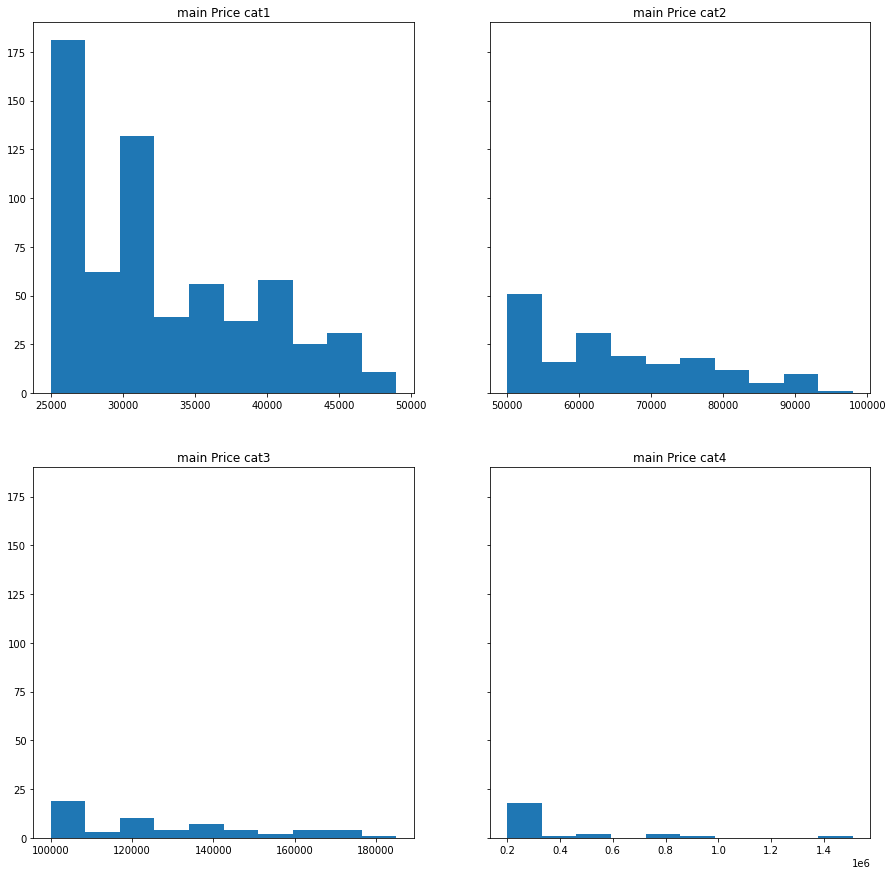

In [ ]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey=True, figsize=(15,15))
ax1.hist(df_reduced_cat1['main_price'], bins = 10)
ax1.set_title('main Price cat1')

ax2.hist(df_reduced_cat2['main_price'], bins = 10)
ax2.set_title('main Price cat2')
ax3.hist(df_reduced_cat3['main_price'], bins = 10)
ax3.set_title('main Price cat3')
ax4.hist(df_reduced_cat4['main_price'], bins = 10)
ax4.set_title('main Price cat4')

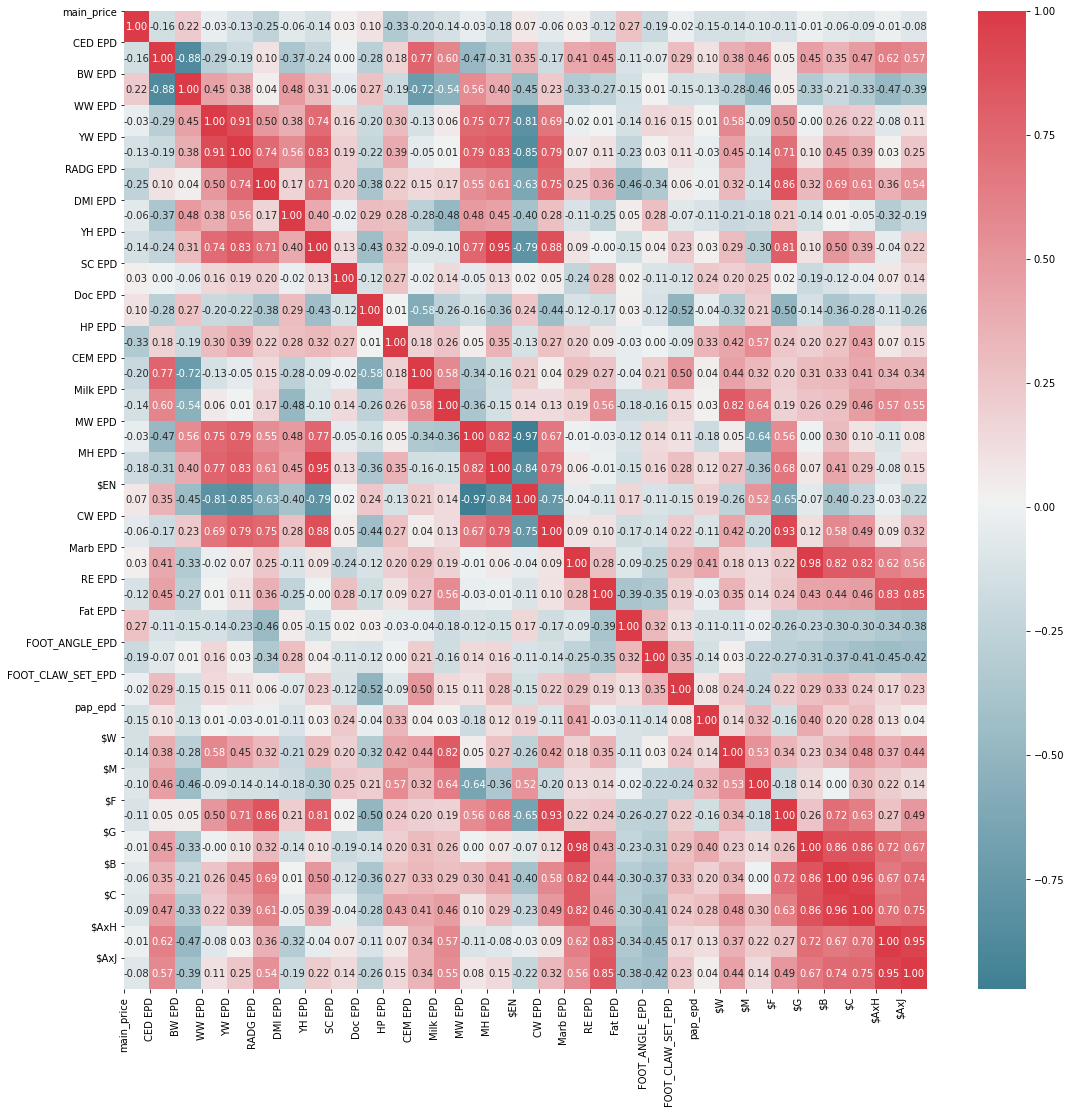

In [ ]:
heatMap(df_reduced_cat4)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import scipy.stats as stats
from sklearn.preprocessing import  LabelEncoder
import pickle

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# Distributions
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

In [ ]:

# PyMC3 for Bayesian Inference
import pymc3 as pm
import arviz as az
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [ ]:

## suppress install output
%%capture

## install pypi release
# !pip install smogn

## install developer version
!pip install git+https://github.com/nickkunz/smogn.git

In [ ]:

## load dependencies
import smogn
import pandas
import seaborn

In [ ]:
df_reduced.reset_index(inplace=True)

In [ ]:
df_reduced.columns

Index(['FY', 'main_price', 'CED EPD', 'BW EPD', 'WW EPD', 'YW EPD', 'RADG EPD',
       'DMI EPD', 'YH EPD', 'SC EPD', 'Doc EPD', 'HP EPD', 'CEM EPD',
       'Milk EPD', 'MW EPD', 'MH EPD', '$EN', 'CW EPD', 'Marb EPD', 'RE EPD',
       'Fat EPD', 'FOOT_ANGLE_EPD', 'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M',
       '$F', '$G', '$B', '$C', '$AxH', '$AxJ'],
      dtype='object')

In [ ]:
df_reduced.drop('FY', axis=1, inplace=True)

In [ ]:
d750=df_reduced['main_price'].quantile(q=0.750)
d500=df_reduced['main_price'].quantile(q=0.500)
d250=df_reduced['main_price'].quantile(q=0.250)
dmin=df_reduced['main_price'].min()
dmax=df_reduced['main_price'].max()
dmin, d250, d500, d750, dmax

(25000, 29000.0, 35000.0, 50000.0, 1510000)

Text(0.5, 1.0, 'Distribution of Main Price')

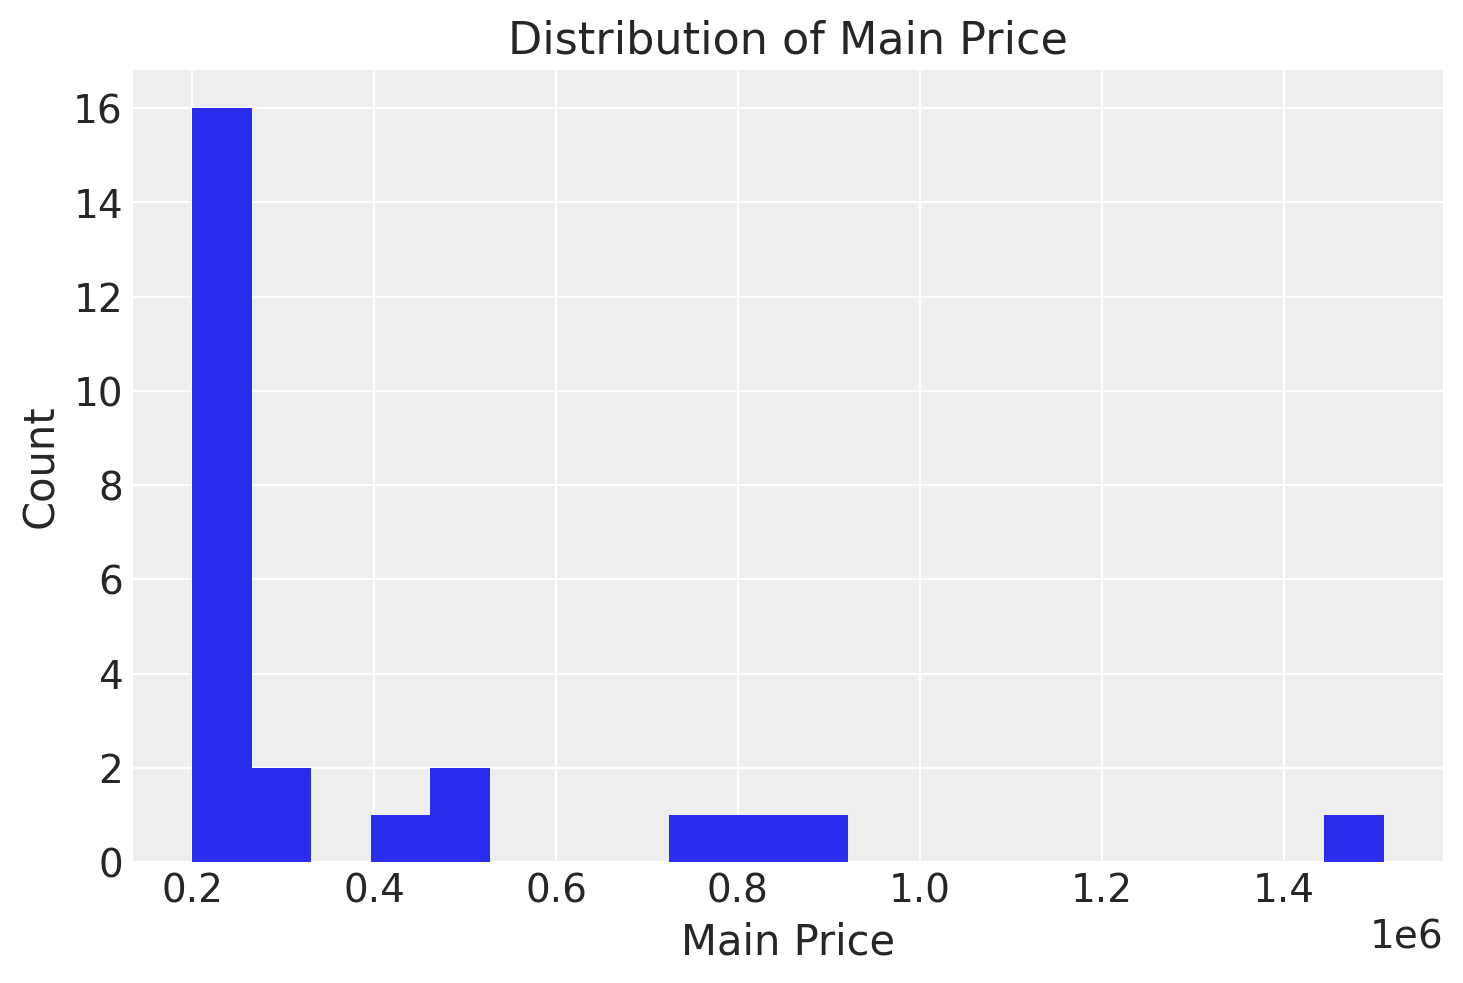

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram of main_price
plt.hist(df_reduced_cat4['main_price'], bins = 20)
plt.xlabel('Main Price')
plt.ylabel('Count')
plt.title('Distribution of Main Price')

In [ ]:
df_reduced.isnull().sum()

main_price           0
CED EPD              0
BW EPD               0
WW EPD               0
YW EPD               0
RADG EPD             0
DMI EPD              0
YH EPD               0
SC EPD               0
Doc EPD              0
HP EPD               0
CEM EPD              0
Milk EPD             0
MW EPD               0
MH EPD               0
$EN                  0
CW EPD               0
Marb EPD             0
RE EPD               0
Fat EPD              0
FOOT_ANGLE_EPD       0
FOOT_CLAW_SET_EPD    0
pap_epd              0
$W                   0
$M                   0
$F                   0
$G                   0
$B                   0
$C                   0
$AxH                 0
$AxJ                 0
dtype: int64

In [ ]:

## specify phi relevance values
rg_mtrx = [

    [29000,  0, 0],  ## under-sample
    [35000, 0, 0],  ## under-sample ("majority")
    [50000, 0, 0], ##over-sample ("minority")
    [300000, 1, 0],  ## over-sample ("minority")
    [400000, 1, 0],  ## over-sample ("minority")
    [500000, 1, 0],  ## over-sample ("minority")
    [700000, 1, 0],  ## over-sample ("minority")
    [800000, 1, 0],  ## over-sample ("minority")
    [900000, 1, 0],  ## over-sample ("minority")
    [1500000, 1, 0],  ## over-sample ("minority")
]

In [ ]:
## conduct smogn
df_reduced_smogn = smogn.smoter(
    
    ## main arguments
    data = df_reduced,           ## pandas dataframe
    y = 'main_price',          ## string ('header name')
    k = 3,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.10,         ## real number (0 < R < 1)
    rel_method = 'manual',    ## string ('auto' or 'manual')
    # rel_xtrm_type = 'both', ## unused (rel_method = 'manual')
    # rel_coef = 1.50,        ## unused (rel_method = 'manual')
    rel_ctrl_pts_rg = rg_mtrx ## 2d array (format: [x, y])
)

# ## conduct smogn
# df_reduced_smogn = smogn.smoter(
    
#     data = df_reduced_cat1,  ## pandas dataframe
#     y = 'main_price'  ## string ('header name')
# )

r_index: 100%|##########| 8/8 [00:00<00:00, 259.32it/s]


Text(0.5, 1.0, 'Distribution of Main Price')

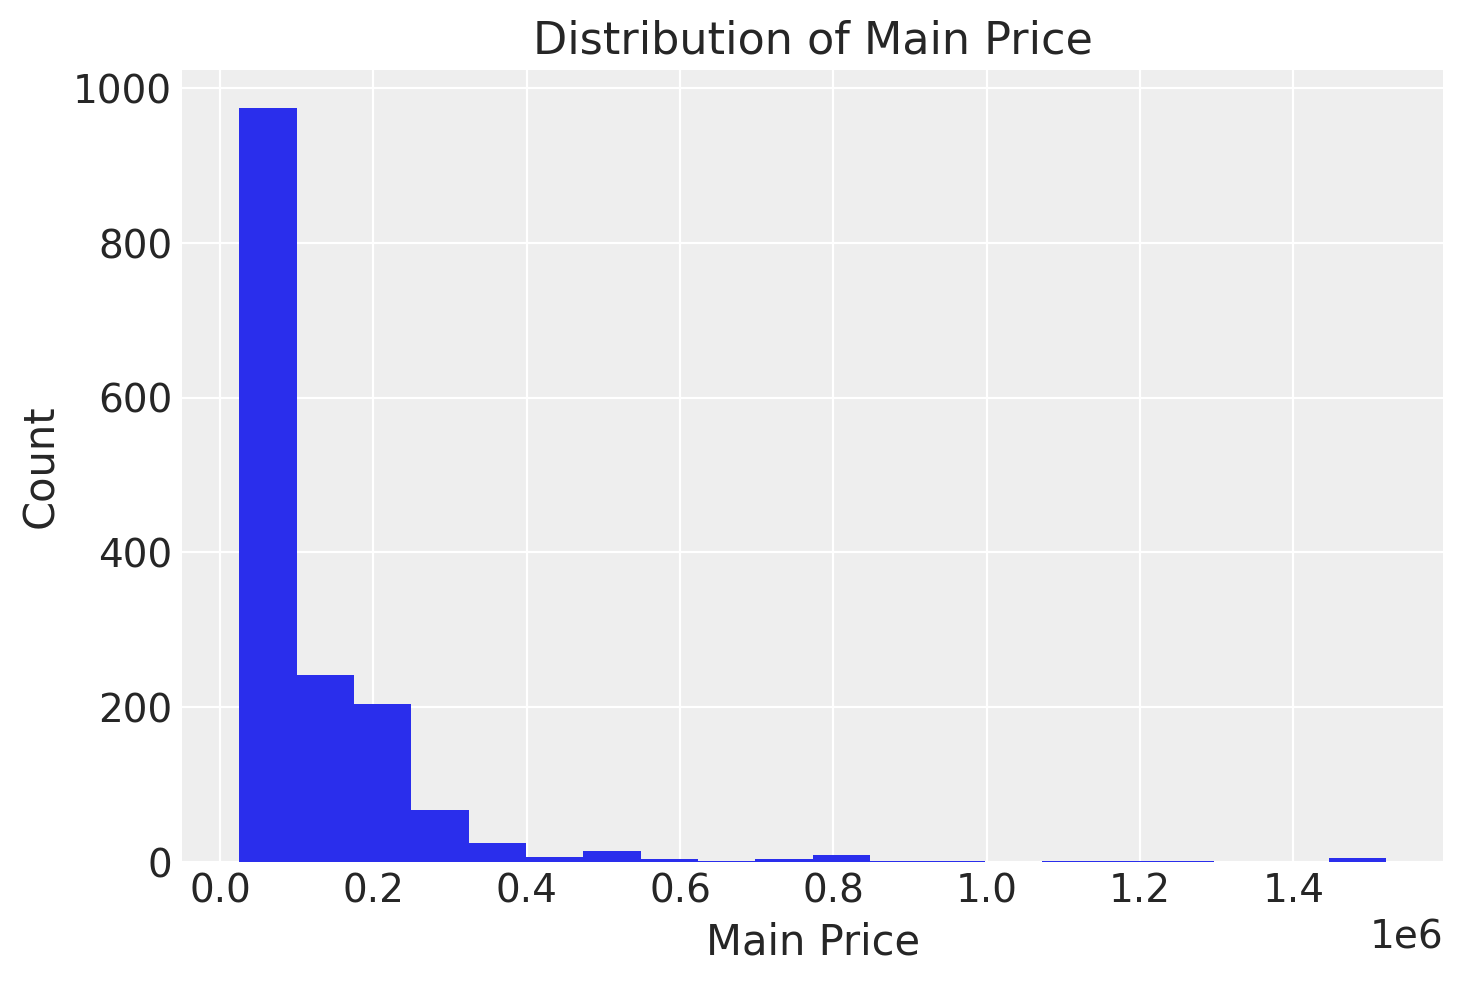

In [ ]:
# Histogram of main_price
plt.hist(df_reduced_smogn['main_price'], bins = 20)
plt.xlabel('Main Price')
plt.ylabel('Count')
plt.title('Distribution of Main Price')

In [ ]:
df_reduced_smogn.columns


Index(['main_price', 'CED EPD', 'BW EPD', 'WW EPD', 'YW EPD', 'RADG EPD',
       'DMI EPD', 'YH EPD', 'SC EPD', 'Doc EPD', 'HP EPD', 'CEM EPD',
       'Milk EPD', 'MW EPD', 'MH EPD', '$EN', 'CW EPD', 'Marb EPD', 'RE EPD',
       'Fat EPD', 'FOOT_ANGLE_EPD', 'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M',
       '$F', '$G', '$B', '$C', '$AxH', '$AxJ'],
      dtype='object')

In [ ]:
try:
  df_reduced_smogn.drop("level_0", axis=1,inplace=True)
except:
  pass

In [ ]:
labels=df_reduced_smogn['main_price'] 
df_reduced_smogn.columns=['main_price','CED_EPD','BW_EPD','WW_EPD','YW_EPD','RADG_EPD',
'DMI_EPD','YH_EPD','SC_EPD','Doc_EPD','HP_EPD','CEM_EPD',
'Milk_EPD','MW_EPD','MH_EPD','EN','CW_EPD','Marb_EPD','RE_EPD',
'Fat_EPD','FOOT_ANGLE_EPD','FOOT_CLAW_SET_EPD','pap_epd','W','M',
'F','G','B','C','AxH','AxJ']

In [ ]:
cols=list(df_reduced_smogn.columns)
df_normalized, dict_values=standarize(df_reduced_smogn,cols)


In [ ]:

# Split into training/testing sets with 25% split. 
X_train, X_test, y_train, y_test = train_test_split(df_normalized, np.log(labels), 
                                                   
                                                    test_size = 0.20,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(1250, 31)
(313, 31)


In [ ]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    r2 = r2_score(true,predictions)
    
    return mae, rmse, r2

In [ ]:
# Naive baseline is the median
median_pred = X_train['main_price'].mean()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['main_price']

# Display the naive baseline metrics
mb_mae, mb_rmse,r2_baseline = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))
print('Median Baseline R2: {:.4f}'.format(r2_baseline))

Median Baseline  MAE: 0.6323
Median Baseline RMSE: 1.0365
Median Baseline R2: -0.0038


In [ ]:
# evaluate an xgboost regression model 
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [ ]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='main_price')
    X_test = X_test.drop(columns='main_price')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse','r2'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        r2 = r2_score(y_test,predictions)
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse,r2]
    
    # Median Value Baseline Metrics
    baseline = np.mean(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    baseline_r2 = r2_baseline
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse, baseline_r2]
    
    return results

In [ ]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse,r2
Linear Regression,0.463761,0.640817,0.567166
ElasticNet Regression,0.813527,0.928581,0.0911488
Random Forest,0.33716,0.551518,0.679394
Extra Trees,0.282447,0.510567,0.725237
SVM,0.33588,0.510534,0.725272
Gradient Boosted,0.421344,0.60691,0.611759
Baseline,0.863382,0.978066,-0.00375792


In [ ]:
!pip install xgboost

In [ ]:
# evaluate an xgboost regression model 
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
# # load the dataset
# X= df_reduced_smogn.drop('main_price',axis=1)
# y=np.log(labels)
# # define model
# model = XGBRegressor()
# # define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # force scores to be positive
# scores = absolute(scores)
# #print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) 

In [ ]:
model = XGBRegressor(max_depth=5, learning_rate=0.2, n_estimators=5000, verbosity=1,objective='reg:squarederror')

In [ ]:
#model = XGBRegressor(verbosity=1,objective='reg:squarederror')

In [ ]:
model.fit(X_train.drop(columns='main_price'),  y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=5000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
yhat = model.predict(X_test.drop(columns='main_price'))

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn import metrics
import numpy as np
metrics.r2_score(y_test, yhat)

0.7232910986810661

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11686 sha256=7d03c5ad8c237db37578f8b69a037f9e3714d17f4c70ca4358f8bd6cc306f096
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error

In [ ]:
# Split into training/testing sets with 25% split. 
X_train, X_test, y_train, y_test = train_test_split(df_normalized.drop(columns="main_price"), np.log(labels),
                                                   
                                                    test_size = 0.25,
                                                    random_state=12)
print(X_train.shape)
print(X_test.shape)

(1172, 30)
(391, 30)


In [ ]:

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
    # for max_depth in range(9,20)
    # for min_child_weight in range(5,8)
    # eta in [.3, .2, .1, .05, .01, .005]:

In [ ]:
def xgb_evaluate(max_depth, gamma, colsample_bytree, learning_rate,n_estimators,eta,min_child_weight):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'learning_rate' : learning_rate,
              'n_estimators' : int(n_estimators),
              'eta':eta,
              'gamma': gamma,
              'min_child_weight':int(min_child_weight),
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=999, nfold=5)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [ ]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 20), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                             'learning_rate' : (0.01,0.3),
                                             'n_estimators': (50,500),
                                             'eta':(.005,.5),
                                             'min_child_weight': (2,8)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=7, n_iter=500, acq='ucb')

|   iter    |  target   | colsam... |    eta    |   gamma   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.4554   |  0.8756   |  0.08969  |  0.326    |  0.1755   |  11.61    |  4.592    |  154.6    |
|  2        | -0.4709   |  0.3643   |  0.209    |  0.7668   |  0.2165   |  4.52     |  6.966    |  148.1    |
|  3        | -0.4776   |  0.6234   |  0.4087   |  0.9026   |  0.2595   |  4.863    |  4.963    |  108.2    |
|  4        | -0.4697   |  0.5795   |  0.2748   |  0.3041   |  0.2742   |  6.03     |  7.713    |  100.8    |
|  5        | -0.4712   |  0.8773   |  0.2622   |  0.7063   |  0.2955   |  18.9     |  4.548    |  68.46    |
|  6        | -0.4667   |  0.5691   |  0.4531   |  0.8814   |  0.1884   |  6.796    |  4.579    |  397.8    |
|  7        | -0.4465   |  0.3844   |  0.296    |  0.407    |  0.09413  |  12.62    |  5.113    |  219.9    |
|  8      

In [ ]:
print(xgb_bo.max)

{'target': -0.41574679999999997, 'params': {'colsample_bytree': 0.3809337961132722, 'eta': 0.13976973807984397, 'gamma': 0.003171254287926639, 'learning_rate': 0.024886886478467384, 'max_depth': 12.69820473127123, 'min_child_weight': 3.1343460543347534, 'n_estimators': 129.11297641004927}}


In [ ]:
 xgb_bo.max['params']

{'colsample_bytree': 0.3809337961132722,
 'eta': 0.13976973807984397,
 'gamma': 0.003171254287926639,
 'learning_rate': 0.024886886478467384,
 'max_depth': 12.69820473127123,
 'min_child_weight': 3.1343460543347534,
 'n_estimators': 129.11297641004927}

In [ ]:
params =  xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])
params['n_estimators'] = int(params['n_estimators'])

In [ ]:
params

{'colsample_bytree': 0.3809337961132722,
 'eta': 0.13976973807984397,
 'gamma': 0.003171254287926639,
 'learning_rate': 0.024886886478467384,
 'max_depth': 12,
 'min_child_weight': 3.1343460543347534,
 'n_estimators': 129}

In [ ]:
num_boost_round =999
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:10.3648
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:10.1086
[2]	Test-rmse:9.85838
[3]	Test-rmse:9.61436
[4]	Test-rmse:9.3765
[5]	Test-rmse:9.1449
[6]	Test-rmse:8.91874
[7]	Test-rmse:8.6986
[8]	Test-rmse:8.48399
[9]	Test-rmse:8.27434
[10]	Test-rmse:8.06997
[11]	Test-rmse:7.87071
[12]	Test-rmse:7.67647
[13]	Test-rmse:7.48693
[14]	Test-rmse:7.30213
[15]	Test-rmse:7.12247
[16]	Test-rmse:6.94679
[17]	Test-rmse:6.77571
[18]	Test-rmse:6.60893
[19]	Test-rmse:6.4466
[20]	Test-rmse:6.28844
[21]	Test-rmse:6.13363
[22]	Test-rmse:5.98329
[23]	Test-rmse:5.83613
[24]	Test-rmse:5.69327
[25]	Test-rmse:5.55361
[26]	Test-rmse:5.41745
[27]	Test-rmse:5.28454
[28]	Test-rmse:5.15492
[29]	Test-rmse:5.02856
[30]	Test-rmse:4.90539
[31]	Test-rmse:4.78521
[32]	Test-rmse:4.66832
[33]	Test-rmse:4.55536
[34]	Test-rmse:4.44514
[35]	Test-rmse:4.33759
[36]	Test-rmse:4.23312
[37]	Test-rmse:4.13028
[38]	Test-rmse:4.02978
[39]	Test-rmse:3.93187
[40]	Test-rmse:3.83716
[41]	Test-rmse

In [ ]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)
r2_score(best_model.predict(dtest), y_test)

[0]	Test-rmse:10.3648
[1]	Test-rmse:10.1086
[2]	Test-rmse:9.85838
[3]	Test-rmse:9.61436
[4]	Test-rmse:9.3765
[5]	Test-rmse:9.1449
[6]	Test-rmse:8.91874
[7]	Test-rmse:8.6986
[8]	Test-rmse:8.48399
[9]	Test-rmse:8.27434
[10]	Test-rmse:8.06997
[11]	Test-rmse:7.87071
[12]	Test-rmse:7.67647
[13]	Test-rmse:7.48693
[14]	Test-rmse:7.30213
[15]	Test-rmse:7.12247
[16]	Test-rmse:6.94679
[17]	Test-rmse:6.77571
[18]	Test-rmse:6.60893
[19]	Test-rmse:6.4466
[20]	Test-rmse:6.28844
[21]	Test-rmse:6.13363
[22]	Test-rmse:5.98329
[23]	Test-rmse:5.83613
[24]	Test-rmse:5.69327
[25]	Test-rmse:5.55361
[26]	Test-rmse:5.41745
[27]	Test-rmse:5.28454
[28]	Test-rmse:5.15492
[29]	Test-rmse:5.02856
[30]	Test-rmse:4.90539
[31]	Test-rmse:4.78521
[32]	Test-rmse:4.66832
[33]	Test-rmse:4.55536
[34]	Test-rmse:4.44514
[35]	Test-rmse:4.33759
[36]	Test-rmse:4.23312
[37]	Test-rmse:4.13028
[38]	Test-rmse:4.02978
[39]	Test-rmse:3.93187
[40]	Test-rmse:3.83716
[41]	Test-rmse:3.74483
[42]	Test-rmse:3.65473
[43]	Test-rmse:3.56703
[4

0.7756006896409682

Test Xgboost RMSE: 0.4051324328090384 R2: 0.8218158807786525


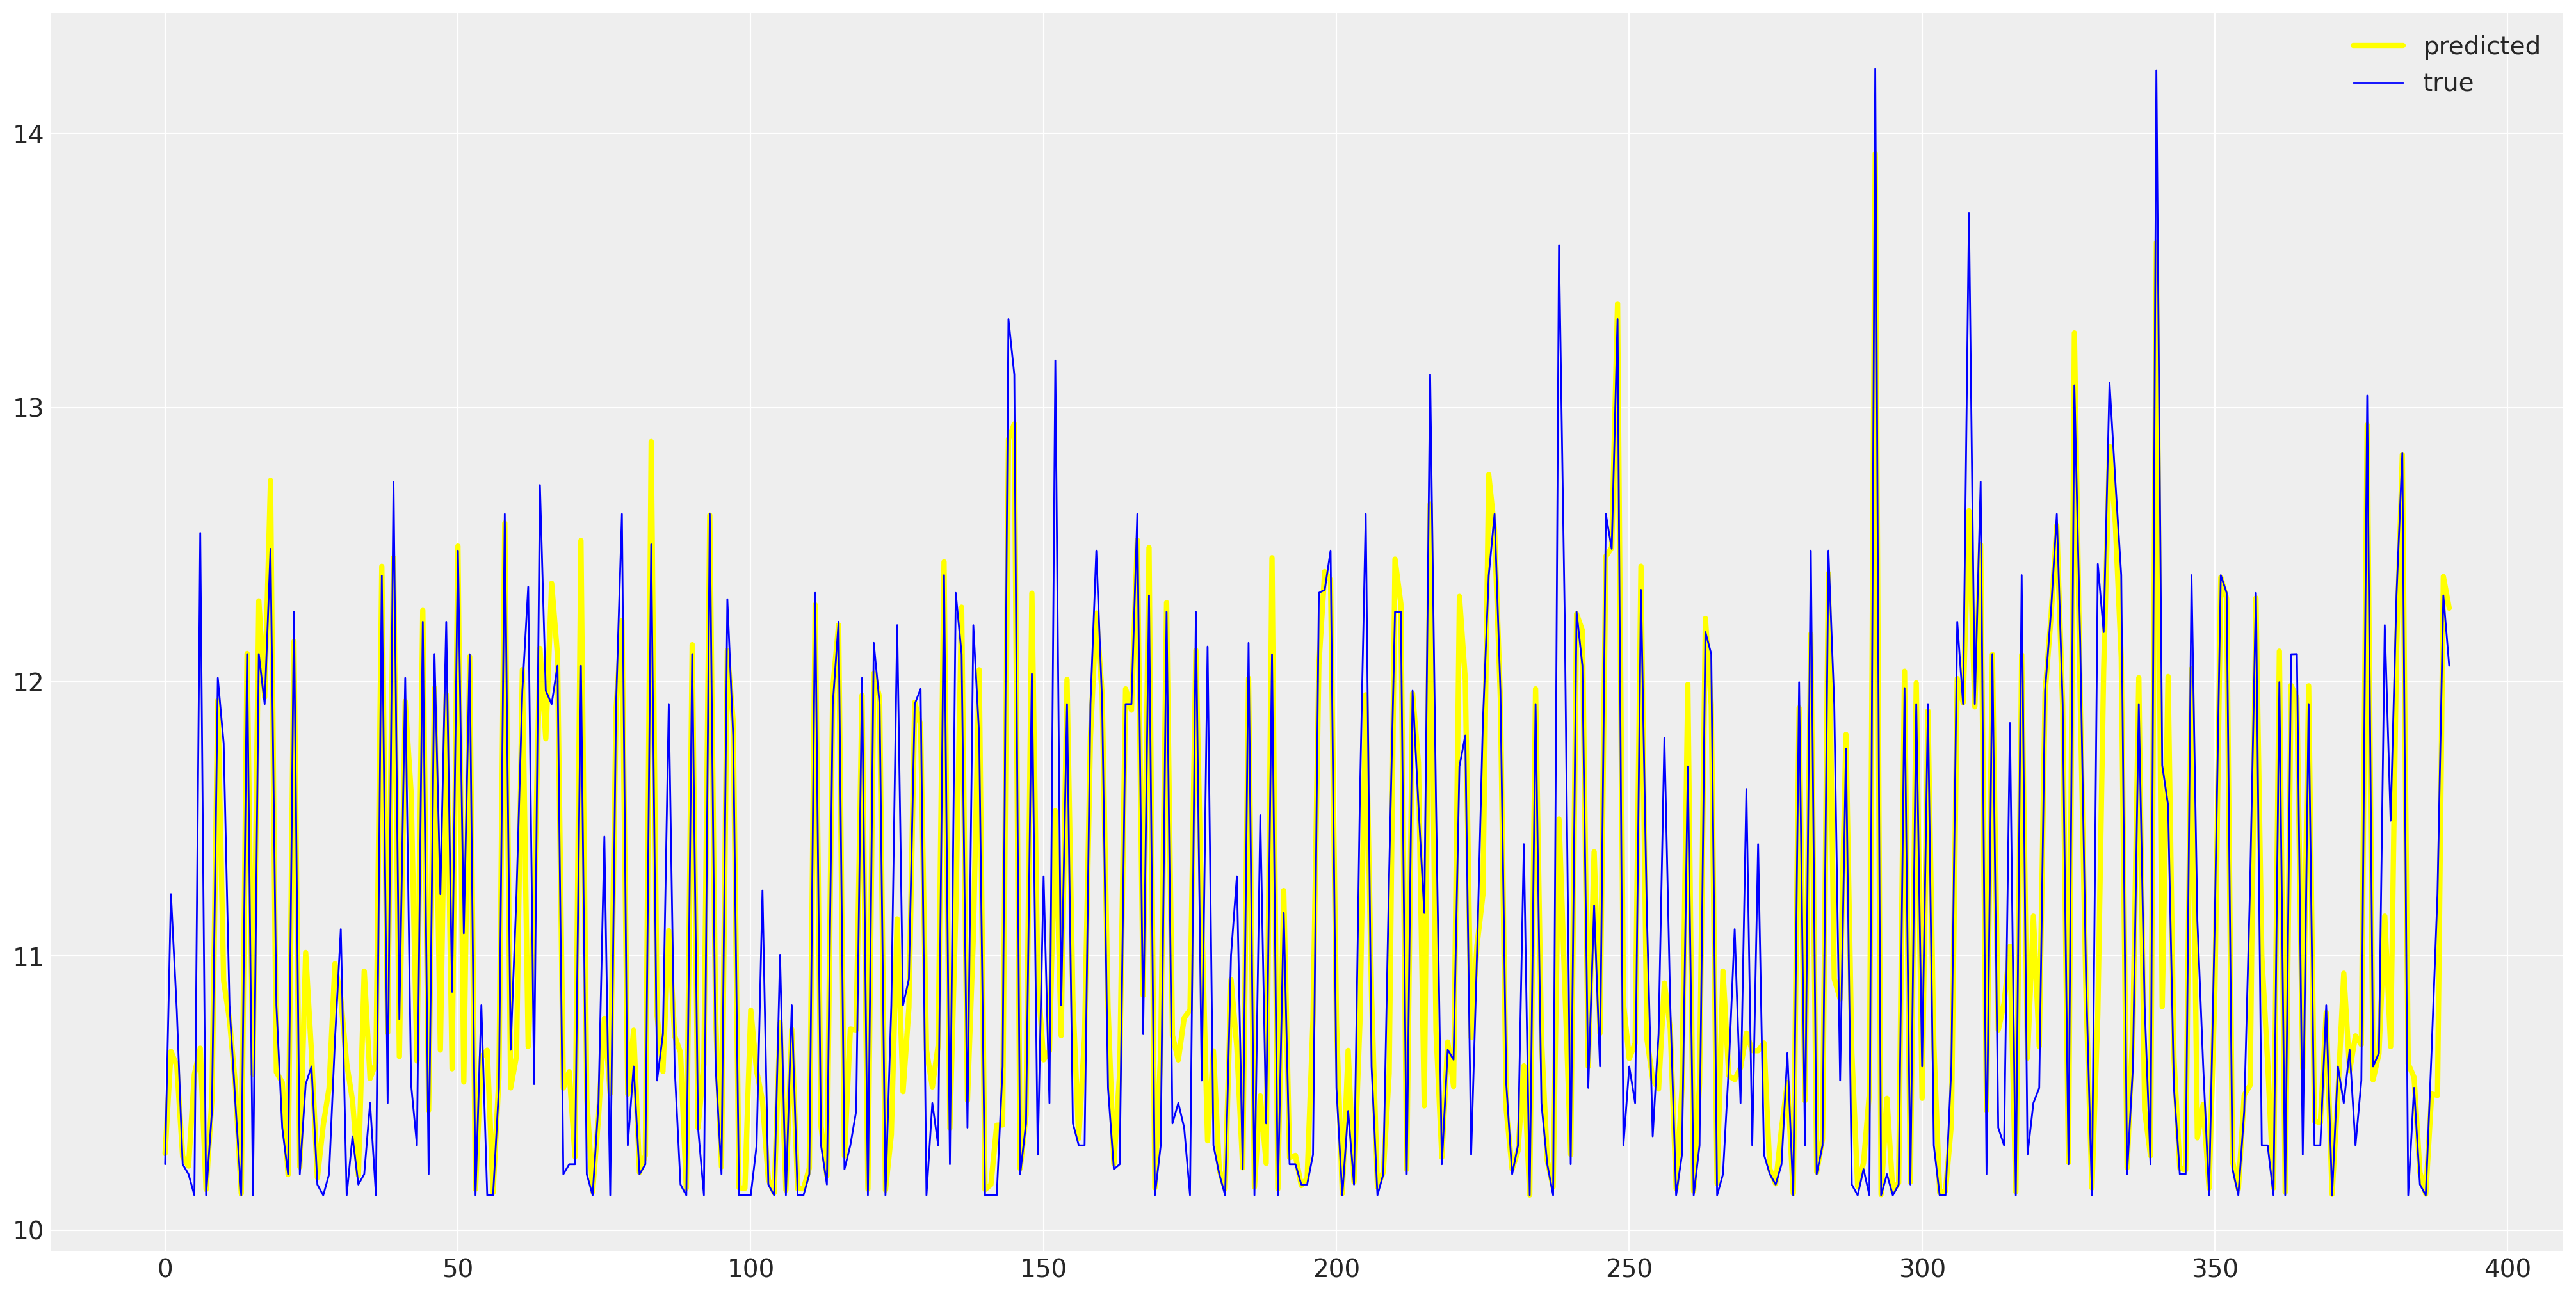

In [ ]:
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
yhat = best_model.predict(dtest)

ny_test=np.array(y_test)

rmse = sqrt(mean_squared_error(y_test, yhat))

r2=r2_score(y_test, yhat)

print(f'Test Xgboost RMSE: {rmse} R2: {r2}' )

# plot forecasts against actual outcomes
plt.figure(figsize=(20,10))
plt.plot(yhat,linewidth=3,color="yellow", label="predicted")

plt.plot(ny_test, color='blue',linewidth=1, label="true")
plt.legend()
plt.show()


In [ ]:
best_model.save_model('bestmodel.pkl')